In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sbn
import matplotlib.pyplot as plt


In [70]:
dataframe=pd.read_csv("maaslar.csv")

In [71]:
dataframe

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [72]:
dizi1=dataframe.iloc[:,1:2].values

In [73]:
dizi1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [74]:
dizi2=dataframe.iloc[:,2:].values

In [75]:
dizi2

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000]], dtype=int64)

Text(0.5, 1.0, 'maaşın eğitim seviyesine göre değişimi')

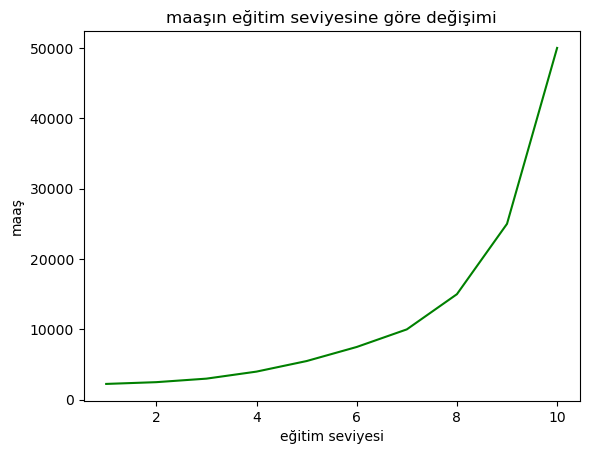

In [76]:
plt.plot(dizi1,dizi2,"g")
plt.xlabel("eğitim seviyesi")
plt.ylabel("maaş")
plt.title("maaşın eğitim seviyesine göre değişimi")

In [77]:
dataframe.isnull().sum()

unvan              0
Egitim Seviyesi    0
maas               0
dtype: int64

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr=LinearRegression()

In [80]:
lr.fit(dizi1,dizi2)

LinearRegression()

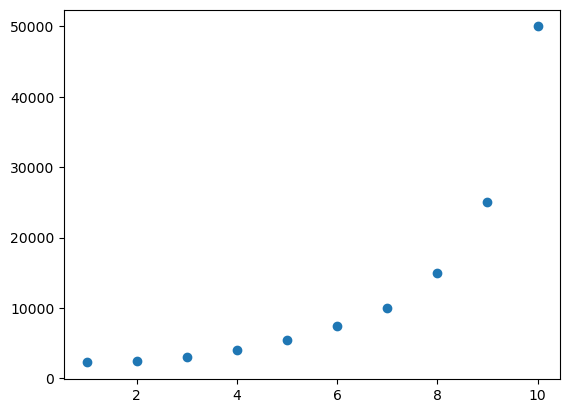

In [81]:
plt.scatter(dizi1,dizi2)

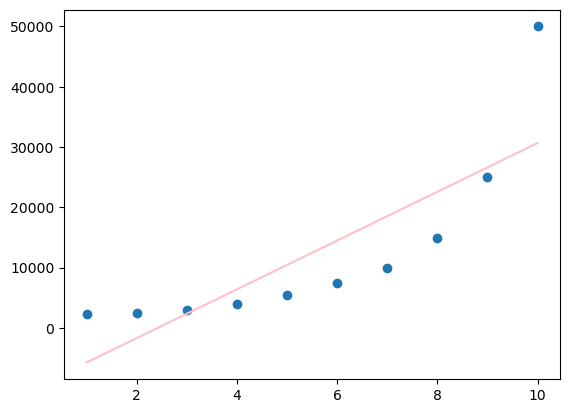

In [82]:
plt.scatter(dizi1,dizi2)
plt.plot(dizi1,lr.predict(dizi1),color="pink")

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
poly_reg=PolynomialFeatures(degree=2)#pf tarafından oluşturulan iki dereceli bir obje

In [85]:
xpol=poly_reg.fit_transform(dizi1)

In [86]:
xpol

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [87]:
lr2=LinearRegression()

In [88]:
lr2.fit(xpol,dizi2)#beta katsayısını bulma

LinearRegression()

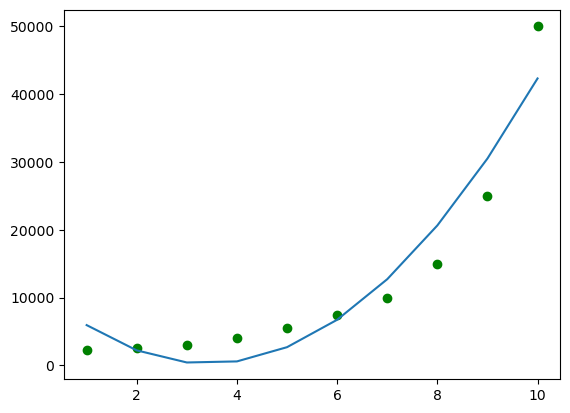

In [89]:
plt.scatter(dizi1,dizi2,color="g")
plt.plot(dizi1,lr2.predict(poly_reg.fit_transform(dizi1)))

In [90]:
poly_reg=PolynomialFeatures(degree=5)

In [91]:
xpol=poly_reg.fit_transform(dizi1)

In [92]:
lr2=LinearRegression()

In [93]:
lr2.fit(xpol,dizi2)

LinearRegression()

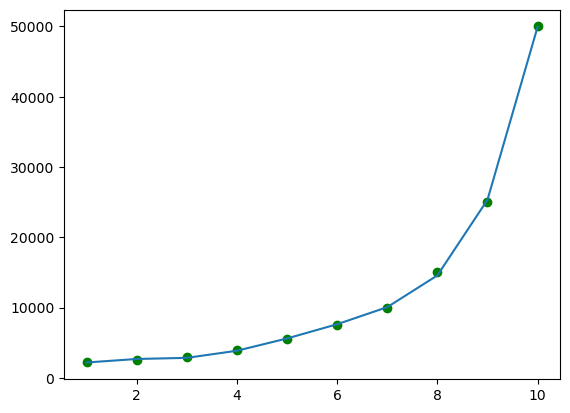

In [94]:
plt.scatter(dizi1,dizi2,color="g")
plt.plot(dizi1,lr2.predict(poly_reg.fit_transform(dizi1)))

In [95]:
lr.predict([[11]])

array([[34716.66666667]])

In [100]:
lr2.predict(poly_reg.fit_transform([[11]]))

array([[100316.66666672]])